##Importamos librerías

In [1]:
import numpy as np # Algebra lineal
import pandas as pd # Procesamiento de datos
import matplotlib.pyplot as plt # Graficar
import seaborn as sns
import math
import statistics as stats

##Importamos datos de Kaggle

In [2]:
!pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d outofskills/driving-behavior

!ls

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
driving-behavior.zip: Skipping, found more recently modified local copy (use --force to force download)
 driving-behavior.zip   kaggle.json   test_motion_data.csv
'kaggle (1).json'       sample_data   train_motion_data.csv


In [3]:
! unzip "/content/driving-behavior.zip"

Archive:  /content/driving-behavior.zip
replace test_motion_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test_motion_data.csv    
replace train_motion_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train_motion_data.csv   


In [4]:
df_train = pd.read_csv("./train_motion_data.csv") # Creamos los DataFrames
df_test = pd.read_csv("./test_motion_data.csv") # Creamos los DataFrames

##Analizamos los datos de df_train

In [5]:
df_train.head() # Observamos los primeros datos

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631


In [6]:
# Verificar existencia de nulls (para proceder a la imputacion de datos)
df_train.isnull().sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64

In [7]:
# Creamos una nueva columna para representar las clases numericamente
df_train['Class2'] = df_train['Class']
df_train = df_train.replace({"Class2":  {"SLOW":1, "NORMAL":2, "AGGRESSIVE":3} })

In [8]:
# Describe
df_train.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp,Class2
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3.644000e+03,3644.000000
mean,0.040467,-0.073418,0.008271,0.001593,-0.001273,0.007949,3.582707e+06,1.940176
std,0.985653,0.903408,0.985061,0.066918,0.126205,0.115687,6.421479e+02,0.816882
min,-4.636523,-4.699795,-7.143998,-0.751822,-1.587028,-1.236468,3.581629e+06,1.000000
25%,-0.550695,-0.592540,-0.558464,-0.028558,-0.053756,-0.029398,3.582121e+06,1.000000
50%,0.003931,-0.080833,0.002262,0.001985,-0.001833,0.002978,3.582702e+06,2.000000
75%,0.595987,0.452401,0.556157,0.031918,0.051313,0.040852,3.583270e+06,3.000000
max,4.985548,4.245151,5.171739,0.849255,1.679879,1.190500,3.583791e+06,3.000000


In [9]:
# Number of predictors/variables/features and obsertations in the dataset
Nr, Nc = df_train.shape
print("Number of observations (rows)  = {0:0d}".format(Nr))
print("Number of columns   = {0:0d}".format(Nc))

print(df_train.columns)

Number of observations (rows)  = 3644
Number of columns   = 9
Index(['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'Class', 'Timestamp',
       'Class2'],
      dtype='object')


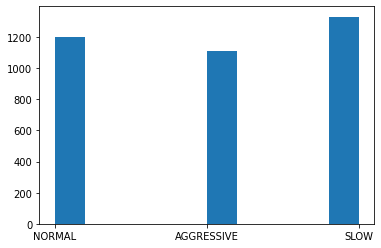

In [10]:
# Frecuencia por clase
plt.hist(df_train['Class'])
plt.show()

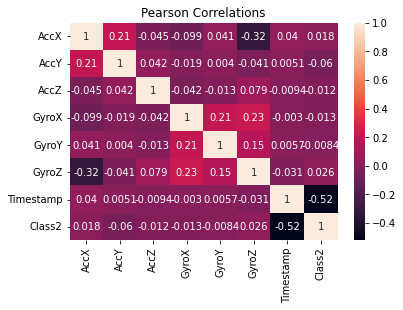

In [11]:
# Calculate correlation between variables
ax = sns.heatmap(df_train.corr(), annot=True).set(title='Pearson Correlations');
# relacion inversamente proporcional Timestamp con la Class2
# nuestra hipotesis es por el trafico en ciertas horas (^人^)

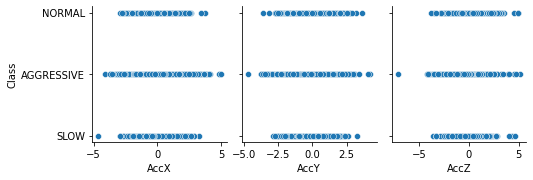

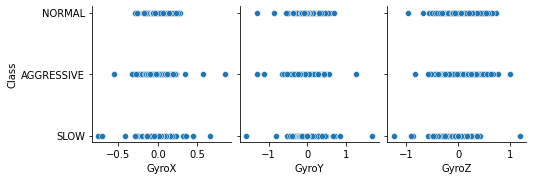

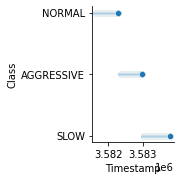

In [12]:
sns.pairplot(
    df_train,
    x_vars = ["AccX", "AccY", "AccZ"],
    y_vars = ["Class"],
)
sns.pairplot(
    df_train,
    x_vars = ["GyroX", "GyroY", "GyroZ"],
    y_vars = ["Class"],
)
sns.pairplot(
    df_train,
    x_vars = ["Timestamp"],
    y_vars = ["Class"],
)
# Gracias a esto reforzamos nuestra hipotesis que los conductores agresivos estan a la misma hora:) sin embargo no creemo que esta sea la razon real por la cual son clasificados como agresivos normales o lentos

### Histogramas

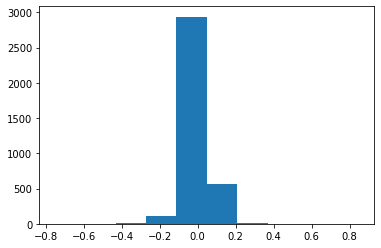

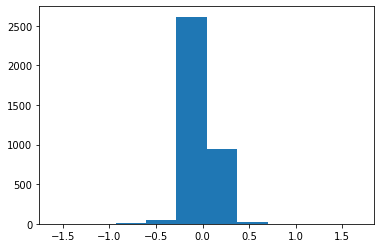

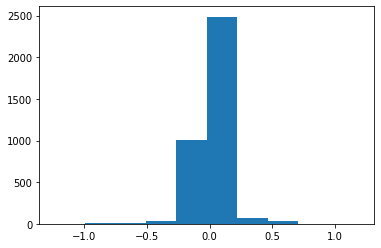

In [13]:
plt.hist(df_train['GyroX'])
plt.show()
plt.hist(df_train['GyroY'])
plt.show()
plt.hist(df_train['GyroZ'])
plt.show()

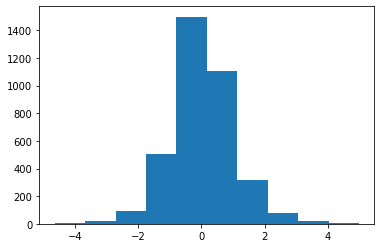

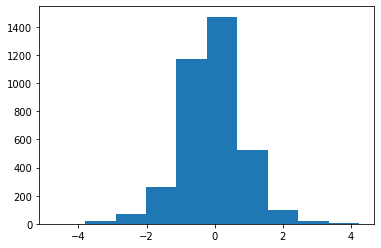

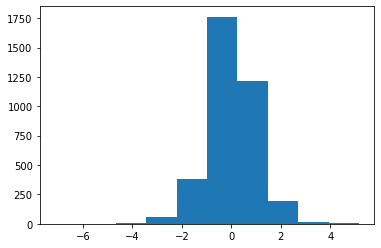

In [14]:
plt.hist(df_train['AccX'])
plt.show()
plt.hist(df_train['AccY'])
plt.show()
plt.hist(df_train['AccZ'])
plt.show()

### Variaciones en el tiempo

In [15]:
# Separamos los datos por clase
df_train_slow = df_train[df_train.Class == "SLOW"]
df_train_normal = df_train[df_train.Class == "NORMAL"]
df_train_aggressive = df_train[df_train.Class == "AGGRESSIVE"]

df_test_slow = df_test[df_test.Class == "SLOW"]
df_test_normal = df_test[df_test.Class == "NORMAL"]
df_test_aggressive = df_test[df_test.Class == "AGGRESSIVE"]

In [16]:
df_train_normal

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp,Class2
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629,2
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630,2
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630,2
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631,2
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631,2
...,...,...,...,...,...,...,...,...,...
1195,-0.820672,2.556599,-0.617599,-0.031612,-0.865596,-0.962189,NORMAL,3582274,2
1196,-0.016871,1.171574,0.603792,0.253662,0.692110,0.537485,NORMAL,3582275,2
1197,2.488864,-1.001262,0.432143,0.140041,-0.080023,0.051847,NORMAL,3582275,2
1198,-0.680338,-0.048300,-3.298533,-0.169057,-0.383012,0.217392,NORMAL,3582276,2


In [17]:
df_train_aggressive

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp,Class2
1200,4.933154,-2.946080,-0.521562,0.226784,-1.290758,-0.309174,AGGRESSIVE,3582366,3
1201,2.397097,2.675064,-3.006705,0.014203,0.009163,0.054902,AGGRESSIVE,3582366,3
1202,-0.147440,0.042525,0.127188,0.017257,-0.003054,0.075060,AGGRESSIVE,3582367,3
1203,0.086913,0.360096,0.520542,0.066737,-0.007941,0.166079,AGGRESSIVE,3582367,3
1204,-1.122270,1.058838,1.156976,0.088728,0.000000,0.381714,AGGRESSIVE,3582368,3
...,...,...,...,...,...,...,...,...,...
2308,0.538870,-1.645984,-0.712197,0.349568,0.028100,0.662712,AGGRESSIVE,3582964,3
2309,1.678918,-1.392127,-0.476326,0.570090,-0.061697,-0.168675,AGGRESSIVE,3582965,3
2310,0.323433,0.589311,-1.939797,-0.027947,1.255328,0.639500,AGGRESSIVE,3582965,3
2311,2.497311,-0.606175,4.700154,0.849255,-0.196699,-0.240757,AGGRESSIVE,3582966,3


#### Variación de aceleración en el tiempo (por clase)

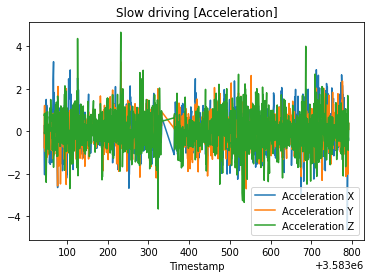

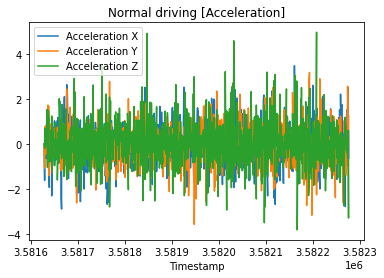

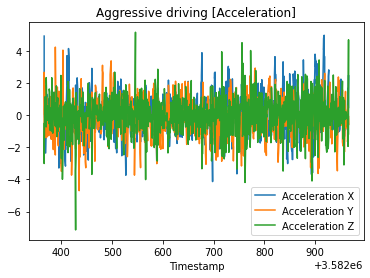

In [18]:
# Graficamos la aceleracion de quienes manejan Slow respecto al Timestamp
plt.plot(df_train_slow['Timestamp'], df_train_slow['AccX'], label='Acceleration X')
plt.plot(df_train_slow['Timestamp'], df_train_slow['AccY'], label='Acceleration Y')
plt.plot(df_train_slow['Timestamp'], df_train_slow['AccZ'], label='Acceleration Z')
plt.title('Slow driving [Acceleration]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

# Graficamos la aceleracion de quienes manejan Normal respecto al Timestamp
plt.plot(df_train_normal['Timestamp'], df_train_normal['AccX'], label='Acceleration X')
plt.plot(df_train_normal['Timestamp'], df_train_normal['AccY'], label='Acceleration Y')
plt.plot(df_train_normal['Timestamp'], df_train_normal['AccZ'], label='Acceleration Z')
plt.title('Normal driving [Acceleration]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

# Graficamos la aceleracion de quienes manejan Aggressive respecto al Timestamp
plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['AccX'], label='Acceleration X')
plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['AccY'], label='Acceleration Y')
plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['AccZ'], label='Acceleration Z')
plt.title('Aggressive driving [Acceleration]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

#### Variación de giroscopio en el tiempo (por clase)

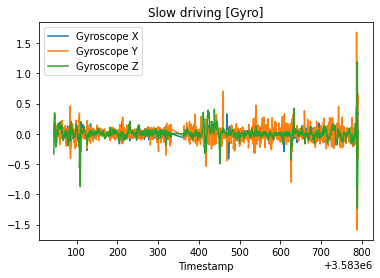

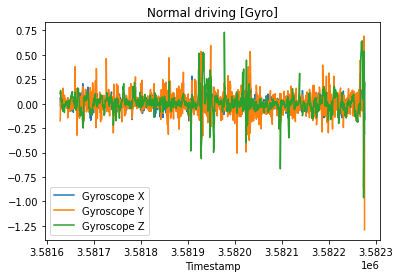

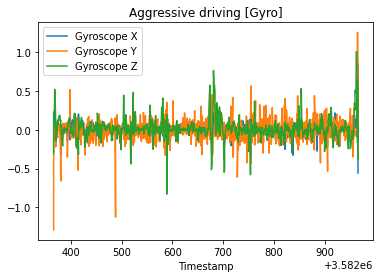

In [19]:
# Graficamos el cambio en el giroscopiode quienes manejan Slow respecto al Timestamp
plt.plot(df_train_slow['Timestamp'], df_train_slow['GyroX'], label='Gyroscope X')
plt.plot(df_train_slow['Timestamp'], df_train_slow['GyroY'], label='Gyroscope Y')
plt.plot(df_train_slow['Timestamp'], df_train_slow['GyroZ'], label='Gyroscope Z')
plt.title('Slow driving [Gyro]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

# Graficamos el cambio en el giroscopio de quienes manejan Normal respecto al Timestamp
plt.plot(df_train_normal['Timestamp'], df_train_normal['GyroX'], label='Gyroscope X')
plt.plot(df_train_normal['Timestamp'], df_train_normal['GyroY'], label='Gyroscope Y')
plt.plot(df_train_normal['Timestamp'], df_train_normal['GyroZ'], label='Gyroscope Z')
plt.title('Normal driving [Gyro]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

# Graficamos el cambio en el giroscopio de quienes manejan Aggressive respecto al Timestamp
plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['GyroX'], label='Gyroscope X')
plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['GyroY'], label='Gyroscope Y')
plt.plot(df_train_aggressive['Timestamp'], df_train_aggressive['GyroZ'], label='Gyroscope Z')
plt.title('Aggressive driving [Gyro]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

Por clase seccionamos los datos, para obtener la desviación estándar en esas secciones y entrenar algún modelo.

In [20]:
def GetStdDev(df, feature):
  des_est = []
  xi = np.array([])
  sum = 0

  for i in range(len(df)):
    sum = sum + df[feature].iloc[i]
    xi = np.append(xi, df[feature].iloc[i])
    
    if (i%100 == 0):
      prom = sum/100
      sums = [(x-prom)**2 for x in xi]
      desv = math.sqrt(np.sum(sums)/100)
      
      des_est.append(desv)
      sum = 0
      xi = []
  return des_est

In [21]:
def GetMode(df, feature):
  moda = []
  lastTimeStamp = []
  xi = np.array([])

  for i in range(len(df)):
    xi = np.append(xi, df[feature].iloc[i])
    
    if (i%100 == 0):      
      moda.append(stats.mode(xi))
      lastTimeStamp.append(df["Timestamp"].iloc[i])
      xi = []
  return moda, lastTimeStamp

In [22]:
slow_dev_accX = GetStdDev(df_train_slow, "AccX")
slow_dev_accY = GetStdDev(df_train_slow, "AccY")
slow_dev_accZ = GetStdDev(df_train_slow, "AccZ")
slow_dev_gyroX = GetStdDev(df_train_slow, "GyroX")
slow_dev_gyroY = GetStdDev(df_train_slow, "GyroY")
slow_dev_gyroZ = GetStdDev(df_train_slow, "GyroZ")
slow_moda, slow_timestamp = GetMode(df_train_slow, 'Class')


normal_dev_accX = GetStdDev(df_train_normal, "AccX")
normal_dev_accY = GetStdDev(df_train_normal, "AccY")
normal_dev_accZ = GetStdDev(df_train_normal, "AccZ")
normal_dev_gyroX = GetStdDev(df_train_normal, "GyroX")
normal_dev_gyroY = GetStdDev(df_train_normal, "GyroY")
normal_dev_gyroZ = GetStdDev(df_train_normal, "GyroZ")
normal_moda, normal_timestamp = GetMode(df_train_normal, 'Class')


agg_dev_accX = GetStdDev(df_train_aggressive, "AccX")
agg_dev_accY = GetStdDev(df_train_aggressive, "AccY")
agg_dev_accZ = GetStdDev(df_train_aggressive, "AccZ")
agg_dev_gyroX = GetStdDev(df_train_aggressive, "GyroX")
agg_dev_gyroY = GetStdDev(df_train_aggressive, "GyroY")
agg_dev_gyroZ = GetStdDev(df_train_aggressive, "GyroZ")
agg_moda, agg_timestamp = GetMode(df_train_aggressive, 'Class')


In [23]:
dataFrameSlow = pd.DataFrame(dict(dev_accX = slow_dev_accX,   dev_accY = slow_dev_accY,   dev_accZ = slow_dev_accZ,    dev_gyroX = slow_dev_gyroX,    dev_gyroY = slow_dev_gyroY,   dev_gyroZ = slow_dev_gyroZ,   timestamp = slow_timestamp,    clase = 'SLOW'))
dataFrameNorm = pd.DataFrame(dict(dev_accX = normal_dev_accX, dev_accY = normal_dev_accY, dev_accZ = normal_dev_accZ,  dev_gyroX = normal_dev_gyroX,  dev_gyroY = normal_dev_gyroY, dev_gyroZ = normal_dev_gyroZ, timestamp = normal_timestamp,  clase = 'NORMAL'))
dataFrameAggr = pd.DataFrame(dict(dev_accX = agg_dev_accX,    dev_accY = agg_dev_accY,    dev_accZ = agg_dev_accZ,     dev_gyroX = agg_dev_gyroX,     dev_gyroY = agg_dev_gyroY,     dev_gyroZ = agg_dev_gyroZ,   timestamp = agg_timestamp,     clase = 'AGGRESSIVE'))

df_dev_train = dataFrameSlow.append([dataFrameNorm, dataFrameAggr], ignore_index=True)
df_dev_train = df_dev_train.sort_values(by='timestamp')
df_dev_train = df_dev_train.replace({"clase":  {"SLOW":0, "NORMAL":1, "AGGRESSIVE":2} })
df_dev_train

,dev_accX,dev_accY,dev_accZ,dev_gyroX,dev_gyroY,dev_gyroZ,timestamp,clase
14,0.000000,0.000000,0.000000,0.005881,0.017296,0.010092,3581629,1
15,1.000575,0.733509,0.725110,0.059531,0.083807,0.082662,3581683,1
16,0.776392,0.647549,0.893668,0.058792,0.093719,0.058319,3581737,1
17,0.787681,0.755803,0.957945,0.053207,0.080464,0.073413,3581791,1
18,0.643934,0.671554,0.872745,0.051495,0.064995,0.039684,3581845,1
19,0.689512,0.627253,0.925774,0.062710,0.116787,0.039607,3581899,1
20,0.850337,0.879042,0.918321,0.086464,0.145866,0.205150,3581953,1
21,0.807494,0.911536,0.842968,0.046367,0.101283,0.122239,3582007,1
22,0.946008,0.810676,1.230368,0.076288,0.144316,0.093934,3582061,1
23,0.837050,0.766751,1.020785,0.047569,0.069779,0.089129,3582115,1


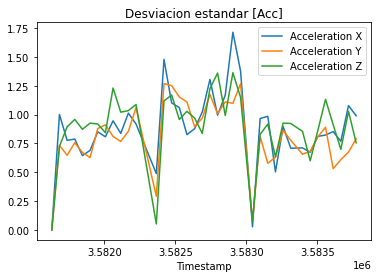

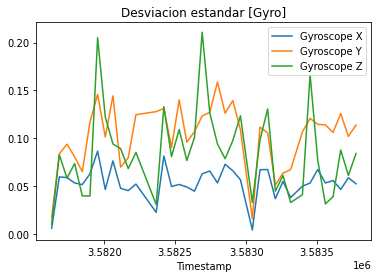

In [24]:
plt.plot(df_dev_train['timestamp'], df_dev_train['dev_accX'], label='Acceleration X')
plt.plot(df_dev_train['timestamp'], df_dev_train['dev_accY'], label='Acceleration Y')
plt.plot(df_dev_train['timestamp'], df_dev_train['dev_accZ'], label='Acceleration Z')
plt.title('Desviacion estandar [Acc]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

plt.plot(df_dev_train['timestamp'], df_dev_train['dev_gyroX'], label='Gyroscope X')
plt.plot(df_dev_train['timestamp'], df_dev_train['dev_gyroY'], label='Gyroscope Y')
plt.plot(df_dev_train['timestamp'], df_dev_train['dev_gyroZ'], label='Gyroscope Z')
plt.title('Desviacion estandar [Gyro]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

In [25]:
slow_dev_accX = GetStdDev(df_test_slow, "AccX")
slow_dev_accY = GetStdDev(df_test_slow, "AccY")
slow_dev_accZ = GetStdDev(df_test_slow, "AccZ")
slow_dev_gyroX = GetStdDev(df_test_slow, "GyroX")
slow_dev_gyroY = GetStdDev(df_test_slow, "GyroY")
slow_dev_gyroZ = GetStdDev(df_test_slow, "GyroZ")
slow_moda, slow_timestamp = GetMode(df_test_slow, 'Class')

normal_dev_accX = GetStdDev(df_test_normal, "AccX")
normal_dev_accY = GetStdDev(df_test_normal, "AccY")
normal_dev_accZ = GetStdDev(df_test_normal, "AccZ")
normal_dev_gyroX = GetStdDev(df_test_normal, "GyroX")
normal_dev_gyroY = GetStdDev(df_test_normal, "GyroY")
normal_dev_gyroZ = GetStdDev(df_test_normal, "GyroZ")
normal_moda, normal_timestamp = GetMode(df_test_normal, 'Class')

agg_dev_accX = GetStdDev(df_test_aggressive, "AccX")
agg_dev_accY = GetStdDev(df_test_aggressive, "AccY")
agg_dev_accZ = GetStdDev(df_test_aggressive, "AccZ")
agg_dev_gyroX = GetStdDev(df_test_aggressive, "GyroX")
agg_dev_gyroY = GetStdDev(df_test_aggressive, "GyroY")
agg_dev_gyroZ = GetStdDev(df_test_aggressive, "GyroZ")
agg_moda, agg_timestamp = GetMode(df_test_aggressive, 'Class')

In [26]:
dataFrameSlow = pd.DataFrame(dict(dev_accX = slow_dev_accX,   dev_accY = slow_dev_accY,   dev_accZ = slow_dev_accZ,   dev_gyroX = slow_dev_gyroX,   dev_gyroY = slow_dev_gyroY,   dev_gyroZ = slow_dev_gyroZ,   timestamp = slow_timestamp,   clase = slow_moda))
dataFrameNorm = pd.DataFrame(dict(dev_accX = normal_dev_accX, dev_accY = normal_dev_accY, dev_accZ = normal_dev_accZ, dev_gyroX = normal_dev_gyroX, dev_gyroY = normal_dev_gyroY, dev_gyroZ = normal_dev_gyroZ, timestamp = normal_timestamp, clase = normal_moda))
dataFrameAggr = pd.DataFrame(dict(dev_accX = agg_dev_accX,    dev_accY = agg_dev_accY,    dev_accZ = agg_dev_accZ,    dev_gyroX = agg_dev_gyroX,    dev_gyroY = agg_dev_gyroY,    dev_gyroZ = agg_dev_gyroZ,    timestamp = agg_timestamp,    clase = agg_moda))

df_dev_test = dataFrameSlow.append([dataFrameNorm, dataFrameAggr], ignore_index=True)
df_dev_test = df_dev_test.sort_values(by="timestamp")
df_dev_test = df_dev_test.replace({"clase":  {"SLOW":0, "NORMAL":1, "AGGRESSIVE":2} })
df_dev_test

,dev_accX,dev_accY,dev_accZ,dev_gyroX,dev_gyroY,dev_gyroZ,timestamp,clase
23,0.075061,0.021561,0.045269,0.000000,0.000000,0.000000,818922,2
24,0.857168,1.520247,0.768957,0.039574,0.080383,0.087762,818976,2
25,1.074314,0.954421,1.251142,0.050826,0.120437,0.061542,819030,2
26,1.988329,1.144827,1.619008,0.077561,0.201197,0.147981,819084,2
27,1.346144,1.130353,1.097232,0.066294,0.106539,0.085034,819138,2
28,0.690575,0.990164,0.759503,0.053636,0.079126,0.141423,819192,2
29,1.663766,1.343319,1.142513,0.056284,0.123177,0.127695,819246,2
30,1.359151,1.085442,1.135580,0.063560,0.112148,0.103901,819300,2
31,0.812627,1.098390,0.742452,0.043648,0.087407,0.172714,819354,2
13,0.069064,0.010489,0.032829,0.008285,0.000083,0.005004,819440,1


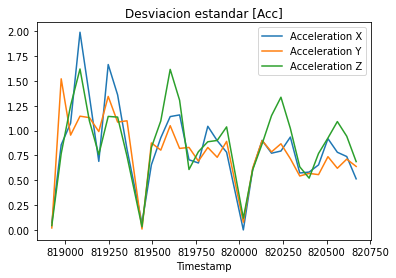

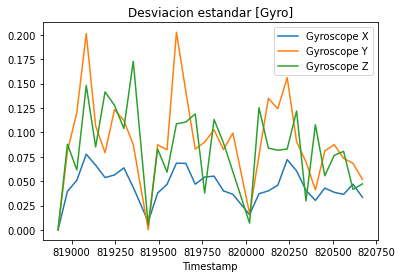

In [27]:
plt.plot(df_dev_test['timestamp'], df_dev_test['dev_accX'], label='Acceleration X')
plt.plot(df_dev_test['timestamp'], df_dev_test['dev_accY'], label='Acceleration Y')
plt.plot(df_dev_test['timestamp'], df_dev_test['dev_accZ'], label='Acceleration Z')
plt.title('Desviacion estandar [Acc]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

plt.plot(df_dev_test['timestamp'], df_dev_test['dev_gyroX'], label='Gyroscope X')
plt.plot(df_dev_test['timestamp'], df_dev_test['dev_gyroY'], label='Gyroscope Y')
plt.plot(df_dev_test['timestamp'], df_dev_test['dev_gyroZ'], label='Gyroscope Z')
plt.title('Desviacion estandar [Gyro]')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

##MODELO

Vemos correlación con las desviaciones

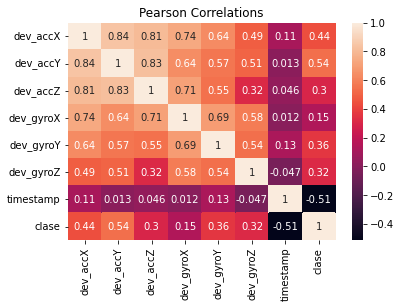

In [28]:
ax = sns.heatmap(df_dev_train.corr(), annot=True).set(title='Pearson Correlations');

###Regresión logística

In [29]:
# Import sklearn linear_model
from sklearn.linear_model import LogisticRegression

# Select variables (one, two, three, four?)
X  = df_dev_train[["dev_accX", "dev_accY"]].values

# Get the class of each observation
y  = df_dev_train["clase"].values

# Fit the model
clfmodel   = LogisticRegression(C=1e5, max_iter=1000)
clfmodel.fit( X , y )

LogisticRegression(C=100000.0, max_iter=1000)

In [30]:
# Compute predictions using the training data
y_pre = clfmodel.predict(X)

In [31]:
X_test = df_dev_test[["dev_accX", "dev_accY"]].values
y_test = df_dev_test["clase"].values
clfmodel.score(X_test, y_test)

0.625

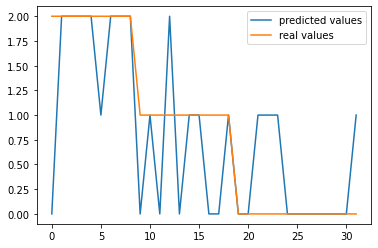

In [32]:
# Make predictions
y_pred_test = clfmodel.predict(X_test)

xlin = np.linspace(0,31, num=32)
plt.plot(xlin, y_pred_test, label="predicted values")
plt.plot(xlin, y_test, label="real values")
plt.legend()
plt.show()

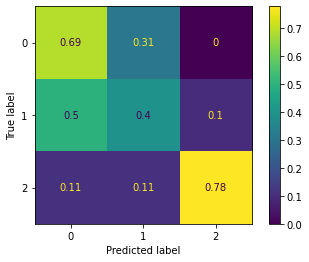

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from locale import normalize

# Create confusion matrix for model X1
CMnorm = confusion_matrix(y_test, y_pred_test, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=CMnorm, display_labels=clfmodel.classes_)
disp.plot()

###Perceptrón
Para clasificar si un conductor es agresivo o no.

In [34]:
# Combinar clases Normal y Slow en "No agresivo"
df_dev_perc_train = df_dev_train.replace({"clase":  {0:1} })

# Para mantener balance en el modelo, seleccionar aleatoriamente la mitad de los valores de la nueva clase "No agresivo"
df_dev_perc_train_ones = df_dev_perc_train[ df_dev_perc_train.clase == 1].sample(frac = 0.5) # Selección aleatoria
df_dev_perc_train      = df_dev_perc_train.drop(df_dev_perc_train_ones.index) # Drop selected half

In [44]:
from sklearn.linear_model import Perceptron

# Select variables (one, two, three, four?)
X  = df_dev_perc_train[["dev_accX", "dev_accY", "dev_gyroY", "dev_gyroZ"]].values

# Get the class of each observation
y  = df_dev_perc_train["clase"].values

X_test = df_dev_test[["dev_accX", "dev_accY", "dev_gyroY", "dev_gyroZ"]].values

df_dev_perc_test = df_dev_test.replace({"clase":  {0:1} })
y_test = df_dev_perc_test["clase"].values

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)
clf.score(X_test, y_test)

0.90625

In [45]:
# Make predictions
y_pred_test = clf.predict(X_test)
y_pred_test

array([1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

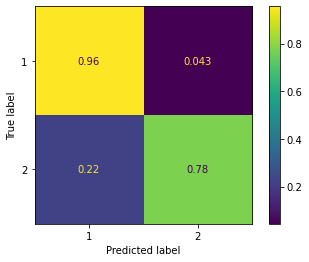

In [46]:
# Create confusion matrix
CMnorm_ = confusion_matrix(y_test, y_pred_test, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=CMnorm_, display_labels=clf.classes_)
disp.plot()